In [72]:
%matplotlib inline
import numpy as np
import pandas as pd
import processors
import matplotlib.pyplot as plt

In [73]:
raw_covid_df = processors.load_data("../data/us-counties.csv")

# Raw Data
The raw data comes from the New York Times and captures (from various sources) the total cases per day, for each county in the United States and Territories.

Since the data is cummulative we need only pull out the data from the last day of the year to get the 2020 total casesWe then want to aggregate over each state to give the total number of cases across each state.


In [230]:
state_total_df = raw_covid_df[raw_covid_df["date"] == "2020-12-31"]
state_total_df_agg_over_county = processors.aggregate_covid_cases_by_group(None, ["state"], state_total_df, "cases")
state_total_df_agg_over_county.set_index("state")

cases                             
                              sum          mean    min     max
state                                                         
Alabama                    361226   5391.432836    490   52339
Alaska                      46740   1669.285714     16   22820
Arizona                    523829  34921.933333    400  322449
Arkansas                   225138   2962.342105    234   24662
California                2307769  39789.120690     24  770915
Colorado                   335579   5243.421875     13   47711
Connecticut                185708  20634.222222    665   56288
Delaware                    57456  14364.000000    136   33211
District of Columbia        28983  28983.000000  28983   28983
Florida                   1323307  19460.397059    750  298872
Georgia                    644065   4025.406250     54   57528
Guam                         8286   8286.000000   8286    8286
Hawaii                      21459   4291.800000      1   18034
Idaho                      141388   3213.363636     53   38417
Illinois                   965840   9469.019608    196  393652
Indiana                    514455   5591.902174    396   70801
Iowa                       281712   2817.120000    266   41499
Kansas                     225455   2126.933962      0   39423
Kentucky                   268828   2240.233333    138   52277
Louisiana                  315275   4850.384615    273   31498
Maine                       24201   1423.588235      1    7233
Maryland                   276834  11073.360000      0   54614
Massachusetts              375178  25011.866667    483   75615
Michigan                   527199   6276.178571     82   84967
Minnesota                  415361   4720.011364    104   86273
Mississippi                215811   2631.841463    152   14714
Missouri                   418637   3578.094017    119   69480
Montana                     81701   1458.946429     10   13847
Nebraska                   167795   1804.247312     16   53284
Nevada                     225178  13245.764706     29  170032
New Hampshire               44028   4002.545455    430   17624
New Jersey                 479381  21790.045455   1057   47442
New Mexico                 142897   4330.212121      8   40808
New York                   979040  16880.000000    102  430863
North Carolina             541070   5410.700000    169   63088
North Dakota                92502   1713.000000      7   19866
Northern Mariana Islands      122     61.000000      2     120
Ohio                       700380   7958.863636    513   84050
Oklahoma                   290936   3729.948718    107   57993
Oregon                     113929   3164.694444     17   25290
Pennsylvania               646060   9642.686567    146   93885
Puerto Rico                109906   1391.215190     28   15250
Rhode Island                87949  14658.166667   2403   58946
South Carolina             307507   6684.934783    473   37327
South Dakota                99164   1502.484848     67   24977
Tennessee                  572579   5964.364583    324   68812
Texas                     1772163   6977.019685      1  237727
Utah                       276612   9220.400000     18  107386
Vermont                      7412    494.133333      9    2658
Virgin Islands               2031    677.000000    174    1028
Virginia                   349584   2628.451128     57   43977
Washington                 251064   6437.538462     48   62582
West Virginia               85334   1551.527273    130    8582
Wisconsin                  520438   7228.305556    421   91624
Wyoming                     44409   1930.826087    140    7045

## Distribution of Cases Across States
We look at how the number of cases breaks down by state.

First we look at the total number of cases.

We can see that 5 states, California, Texas, Florida, New York, and Illinois account for just over 1/3 of all cases in the US. But those are also populous states.

<Figure size 432x288 with 0 Axes>

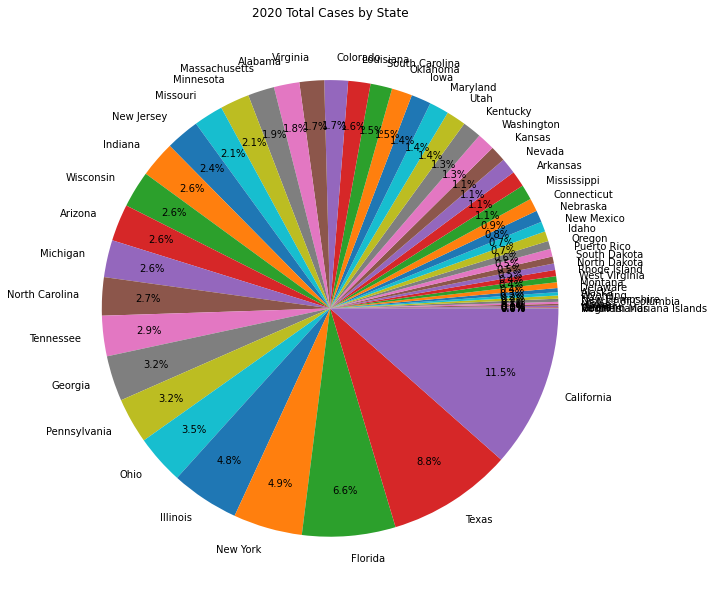

In [208]:
plot_df = state_total_df_agg_over_county
plot_df = plot_df.sort_values(by=("cases","sum"))
plt.figure(3)
fig, axes = plt.subplots()
fig.set_size_inches(11, 10.5)
axes.pie(plot_df["cases","sum"], labels=plot_df["state"], autopct="%1.1f%%", pctdistance=0.8)
axes.set_title("2020 Total Cases by State")
plt.savefig("by_state_2020_pie.png")
plt.show()

### Normalizing by Population
Using Census data with 2019 Estimated Population numbers by State and County, we aggregate over the states to get a total population by State.

Dividing the Total number of Cases in 2020 for each state by its population value (scaled to units of 1000 people). By scaling the cases by the population, we can see that most states share an equal portion of the total US cases.

<Figure size 432x288 with 0 Axes>

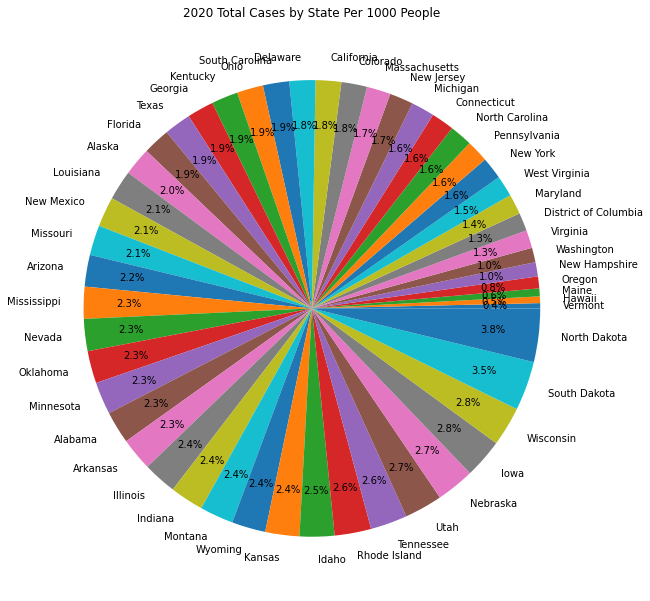

In [211]:
population_df = processors.load_data("../data/census_population_only_estimates_2019.csv")
plot_df = state_total_df_agg_over_county
pop_by_state_df =  processors.aggregate_covid_cases_by_group(None, ["STNAME"], population_df, "POPESTIMATE2019")
pop_state_names = pop_by_state_df["STNAME"].unique()
plot_state_names = plot_df["state"].unique()
common_state_names = np.intersect1d(pop_state_names,plot_state_names)
plot_df = plot_df[plot_df["state"].isin(common_state_names)]
pop_by_state_df = pop_by_state_df[pop_by_state_df["STNAME"].isin(common_state_names)]
plot_df = plot_df.sort_values(by="state")
pop_by_state_df= pop_by_state_df.sort_values(by="STNAME")
plot_df["pop_value"] = pop_by_state_df["POPESTIMATE2019","sum"].values
plot_df["cases_per_cap_1000"] = plot_df["cases","sum"] / (plot_df["pop_value"]/ 1000)
plot_df = plot_df.sort_values(by="cases_per_cap_1000")
plt.figure(4)
fig, axes = plt.subplots()
fig.set_size_inches(11, 10.5)
axes.pie(plot_df["cases_per_cap_1000"], labels=plot_df["state"], autopct="%1.1f%%", pctdistance=0.8)
axes.set_title("2020 Total Cases by State Per 1000 People")
plt.savefig("by_state_2020_pie_per_cap.png")
plt.show()

Looking at the distribution of the per-capita values, most states have anywhere from 20 to 40 cases per 1000 (which is still a large number of cases). But there are the tails where a small number of states have fewer thatn 20 cases per 1000 and 2 states with a disproporitionate number of cases.

<Figure size 432x288 with 0 Axes>

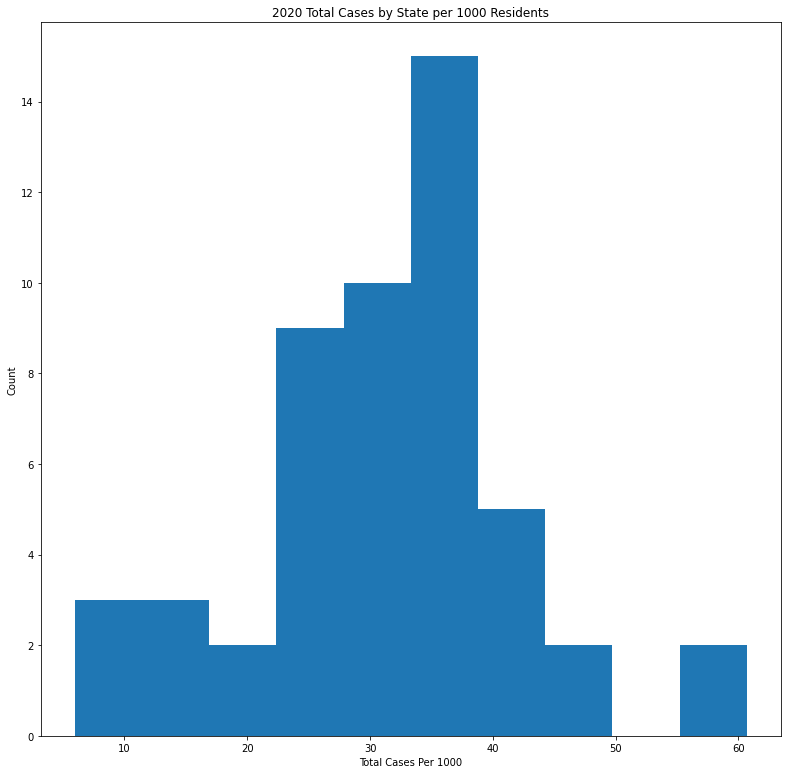

In [223]:
plt.figure(5)
fig, axes = plt.subplots()
fig.set_size_inches(11, 10.5)
fig.tight_layout()
axes.hist(plot_df["cases_per_cap_1000"], bins=10)
axes.set_title("2020 Total Cases by State per 1000 Residents")
axes.set_ylabel("Count")
axes.set_xlabel("Total Cases Per 1000")
plt.show()

## Distribution by County
Looking at the state level data only gives part of the picture. How do cases break down by Counties across the US.

First we look at the end of year totals by county.

Because of the large range of total cases, we look at the the distribution of cases, but using a log-log scale.
The data is binned by logorithmic bins from 0.1 to 1,000,000 by 0.1 increments in the log value.

There is very broad peak center at around 1000 cases per county, but is broad by 1 to 2 orders of magnitude in either direction.

<Figure size 432x288 with 0 Axes>

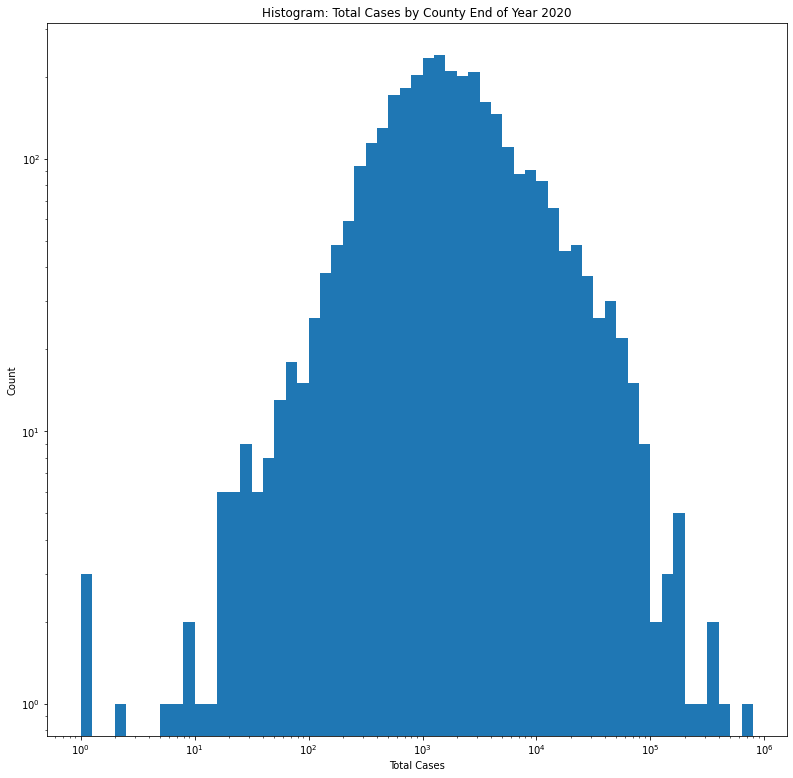

In [234]:
plt.figure(4)
bins = 10**np.arange(0,6,0.1)
fig, axes = plt.subplots()
fig.set_size_inches(11, 10.5)
fig.tight_layout()
axes.hist(state_total_df[state_total_df["cases"] > 0]["cases"],bins=bins)
axes.set_title("Histogram: Total Cases by County End of Year 2020")
axes.set_yscale("log")
axes.set_xscale("log")
axes.set_ylabel("Count")
axes.set_xlabel("Total Cases")
plt.savefig("total_cases_histogram_by_county.png")
plt.show()

In [111]:
def get_state_by_month(month):
    """
    Helper function that extracts raw covid data from the last day of each month.
    """
    dates = raw_covid_df[(raw_covid_df["date"] >= f"2020-{month:02}") & (raw_covid_df["date"] < f"2020-{month+1:02}")]["date"].to_numpy()
    max_date = np.max(dates)
    by_month_state_df = raw_covid_df[raw_covid_df["date"] == max_date]
    return by_month_state_df

### Over Time
How does this distribution evolve over time. We look at the month-to-month distribution of new cases by County. We start the plot in April of 2020 due to the scarcity of data near the beginning of the Pandemic in the US.

For most of the year, the peak of the distribution is on the order of a few hundred new cases per county per month. But in the last quarter of the year, this peak moves up to about 1000 new cases per month.

<Figure size 432x288 with 0 Axes>

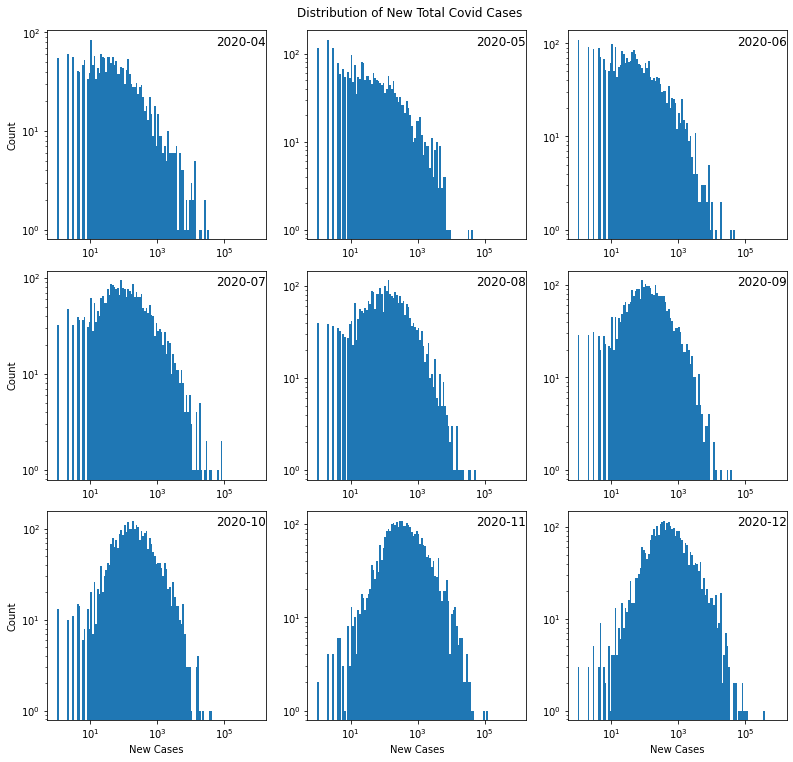

In [192]:
plt.figure(5)
bins = 10**np.arange(0,6,0.05)
fig, axes = plt.subplots(3,3)
fig.suptitle('Distribution of New Total Covid Cases')
fig.set_size_inches(11, 10.5)
fig.tight_layout()
for c_index in np.arange(0,3):
    for r_index in np.arange(0,3):
        # we want our starting month to be month 4
        month = r_index*3 + c_index + 4
        # cases broken up by state and county
        prev_month_df = get_state_by_month(month-1)
        data_df = get_state_by_month(month)
        prev_month_fips = prev_month_df["fips"].unique()
        current_fips = data_df["fips"].unique()
        common_fips = np.intersect1d(prev_month_fips,current_fips)
        data_df = data_df[data_df["fips"].isin(common_fips)]
        data_df.sort_values(by=["fips"])
        prev_month_df = prev_month_df[prev_month_df["fips"].isin(common_fips)]
        prev_month_df.sort_values(by=["fips"])

        data_df["prev_cases"] = prev_month_df["cases"].values
        data_df["new_cases"] = data_df["cases"] - data_df["prev_cases"]
        axes[r_index,c_index].hist(data_df["new_cases"],bins=bins)
        axes[r_index,c_index].set_title(f"2020-{month:02}", loc="right",y=0.9)
        axes[r_index,c_index].set_yscale("log")
        axes[r_index,c_index].set_xscale("log")
        if c_index == 0:
            axes[r_index,c_index].set_ylabel("Count")
        if r_index == 2:
            axes[r_index,c_index].set_xlabel("New Cases")
plt.savefig("2020-by-month.png",  pad_inches=1)
plt.show()

#### Season Variations
Hidden in the overall histograms is the behavior of the tail (large numbers of new cases).

We filter out any record that has less than 10000 new cases for that month.

We can see an increase in the number of incidences where some counties saw large surges in new cases during the mid-summer months and then again around the end-of-year holidays.

<Figure size 432x288 with 0 Axes>

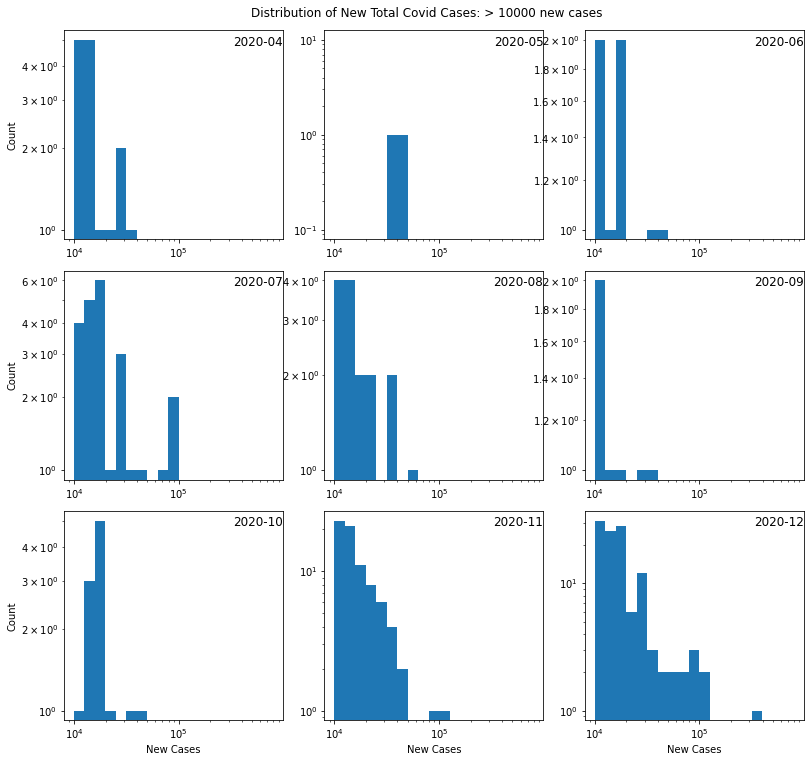

In [193]:
plt.figure(5)
bins = 10**np.arange(4,6,0.1)
fig, axes = plt.subplots(3,3)
fig.suptitle('Distribution of New Total Covid Cases: > 10000 new cases')
fig.set_size_inches(11, 10.5)
fig.tight_layout()
for c_index in np.arange(0,3):
    for r_index in np.arange(0,3):
        # we want our starting month to be month 4
        month = r_index*3 + c_index + 4
        # cases broken up by state and county
        prev_month_df = get_state_by_month(month-1)
        data_df = get_state_by_month(month)
        prev_month_fips = prev_month_df["fips"].unique()
        current_fips = data_df["fips"].unique()
        common_fips = np.intersect1d(prev_month_fips,current_fips)
        data_df = data_df[data_df["fips"].isin(common_fips)]
        data_df.sort_values(by=["fips"])
        prev_month_df = prev_month_df[prev_month_df["fips"].isin(common_fips)]
        prev_month_df.sort_values(by=["fips"])

        data_df["prev_cases"] = prev_month_df["cases"].values
        data_df["new_cases"] = data_df["cases"] - data_df["prev_cases"]
        data_df = data_df[data_df["new_cases"] >= 10000]
        axes[r_index,c_index].hist(data_df["new_cases"],bins=bins)
        axes[r_index,c_index].set_title(f"2020-{month:02}", loc="right",y=0.9)
        axes[r_index,c_index].set_yscale("log")
        axes[r_index,c_index].set_xscale("log")
        if c_index == 0:
            axes[r_index,c_index].set_ylabel("Count")
        if r_index == 2:
            axes[r_index,c_index].set_xlabel("New Cases")
plt.savefig("2020-by-month-long-tail.png",  pad_inches=1)
plt.show()

## Epidemiological Graph

Personal Note: Early in the Pandemic I found some article that described plotting the cummulative number of cases which grows over time and the number of new cases per day. (though I can not find that article now).

This data is taken from another of the New York Times datasets where they have aggregated the total number of cases across all the states.

But it does nicely show the rise and fall of new cases over time.

Given the large range of the total number of cases over time, this is plotted as a log-log scatter plot.

There are 3 distinct periods of growth. The early growth period where we reach about 50,000 cases and then the number of new cases starts to decline. Until we reach 1,000,000 total cases and then being another period if an increase in the number of new cases per day. This starts to decline but then rebounds and new cases start to climb again. At the end of Feb 2021 we were again in period where the number of new cases per day is again declining, but that is still a large number of new cases per day (1000's of new cases per day)

In [227]:
us_data_df = processors.load_data("../data/us.csv")
us_data_df["new_cases"] = us_data_df["cases"] - us_data_df["cases"].shift(1)
us_data_df

,date,cases,deaths,new_cases
0,2020-01-21,1,0,NaN
1,2020-01-22,1,0,0.0
2,2020-01-23,1,0,0.0
3,2020-01-24,2,0,1.0
4,2020-01-25,3,0,1.0
...,...,...,...,...
394,2021-02-18,27944914,492946,71874.0
395,2021-02-19,28022932,495572,78018.0
396,2021-02-20,28092672,497403,69740.0
397,2021-02-21,28147867,498650,55195.0


<Figure size 432x288 with 0 Axes>

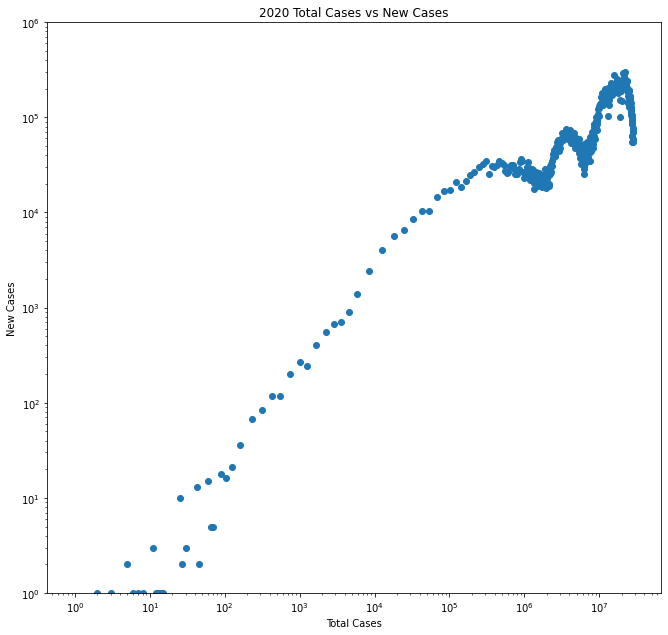

In [229]:
plt.figure(6)
fig, axes = plt.subplots()
fig.set_size_inches(11, 10.5)

axes.scatter(us_data_df["cases"], us_data_df["new_cases"])
axes.set_title("2020 Total Cases vs New Cases")
axes.set_xscale("log")
axes.set_yscale("log")
axes.set_ylim(1, 1000000)
axes.set_xlabel("Total Cases")
axes.set_ylabel("New Cases")
plt.show()